[INFO] 
labels: 
 [0 1 2 3 4 5 6 7 8 9] 
count per class 
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Training set dimensions: 60000 x 784
Test set dimensions: 10000 x 784
5


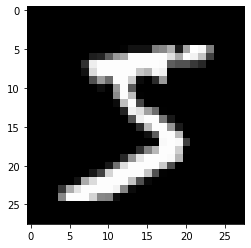

In [1]:
#load data
import numpy as np
import matplotlib.pyplot       as plt
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
        images_path='MNIST/train-images-idx3-ubyte', 
        labels_path='MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='MNIST/t10k-images-idx3-ubyte', 
        labels_path='MNIST/t10k-labels-idx1-ubyte')

labels,count_class = np.unique(y_train,return_counts=True)


print('[INFO] \nlabels: \n %s \ncount per class \n %s' % (labels,count_class))
print('Training set dimensions: %s x %s' % (X_train.shape[0],X_train.shape[1]))
print('Test set dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))

dim1=28
dim2=28     
image = X_train[0].reshape((28,28))
print(y_train[0])
plt.imshow(image,cmap="gray");



In [2]:
#multilayer feedforward
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [3]:
num_classes = labels.size


model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)

print('convertir: ',y_train[0],' a one hot encoding : ',train_labels[0])

convertir:  5  a one hot encoding :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

3


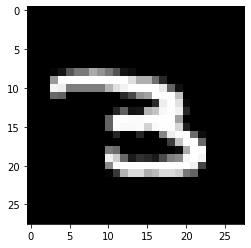

In [6]:
indx = 250
image = X_train[indx,:,:,0]
print(y_train[indx])
plt.imshow(image,cmap="gray");



In [7]:
#'binary_crossentropy'
#'categorical_crossentropy'

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, train_labels, epochs=1, batch_size=10)

6000/6000 [==============================] - 377s 63ms/step - loss: 0.2300 - accuracy: 0.9484


In [15]:
predictions = model.predict(X_test)
predictions[0]

array([2.3347036e-23, 4.4647870e-34, 4.6469492e-19, 1.8106955e-17,
       3.5146765e-36, 4.2228088e-26, 3.1164277e-32, 1.0000000e+00,
       9.5669416e-20, 4.7704641e-21], dtype=float32)

In [16]:
predictions = model.predict_classes(X_test)
predictions[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


7

In [17]:
print("etiqueta 10 primeras imagenes de prueba:  ",y_test[:10],\
      "\nprediccion 10 primeras imagenes de prueba:",predictions[:10])

etiqueta 10 primeras imagenes de prueba:   [7 2 1 0 4 1 4 9 5 9] 
prediccion 10 primeras imagenes de prueba: [7 2 1 0 4 1 4 9 5 9]


In [18]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))


313/313 [==============================] - 4s 12ms/step - loss: 0.1358 - accuracy: 0.9734
Accuracy: 97.34
